In [130]:
%run functions.ipynb
%run matrix_DFM_class.ipynb
%run PVD_class.ipynb
%run SPCP_class.ipynb
from numpy.linalg import svd,matrix_rank

In [163]:
M,R,C,f,P,D,risk=generate_matrix_test_data(20,20,10000)

In [164]:
#generate an example problem: recover L_0 (and C_0) when given M_0
rho = .01   #proportion of corrupted entries
var = 20    #variance of the normal distribution generating the noise
def add_noise(L_0, rho, var):
    S_0 = np.random.binomial(1,rho, L_0.shape)  #affected entries
    N   = np.random.normal(0, var, L_0.shape)   #noise into affected entries
    C_0 = S_0 * N

    return(C_0 + L_0, C_0)

y, C_0 = add_noise(M, rho, var)

In [145]:
true_low_rk=np.einsum('im,jn,mnt->ijt',R,C,f)+np.einsum('im,jn,mnt->ijt',P,D,risk)+np.random.normal(0, 0.0001, y.shape)

In [167]:
svd((y)[0,:,:])[1]

array([249.13839041, 243.04176257, 239.74845539, 238.11892209,
       232.36549608, 229.36413123, 228.72274376, 228.33414741,
       226.52139088, 224.80160217, 223.4265975 , 221.09891386,
       219.0154351 , 215.82605869, 213.61941286, 211.27985845,
       209.16682699, 207.96279994, 206.70688884, 202.33882173])

In [166]:
svd(M[0,:,:])[1]

array([131.21853033, 129.35689731, 106.74309849, 106.48681521,
       105.12168375, 104.0283607 , 102.80199498, 102.05745185,
       101.67273411, 101.09091722, 100.54320293, 100.24793131,
        99.62908766,  99.26252033,  99.0892592 ,  98.39484258,
        97.98391187,  97.72814209,  97.18763442,  96.94627945])

In [101]:
model=PVD(new_mat.reshape(20,20,5000))

In [148]:
model=PVD(true_low_rk)

In [149]:
model.fit()

In [150]:
trace_stat(np.hstack([P,R]).T,model.left_loading.T)

0.9999999999961074

In [151]:
trace_stat(np.hstack([C,D]).T,model.right_loading.T)

0.9999999999954838

In [152]:
model.left_loading.T.shape

(7, 20)

In [153]:
model.right_loading.T.shape

(5, 20)

In [157]:
model=StablePCP()
model.fit(y[0,:,:])
model.get_rank()

20
678.1210159675135
1
610.3089143707622
0
549.278022933686
0
494.3502206403174
0
444.91519857628566
0
400.42367871865713
0
360.38131084679145
0
324.3431797621123
0
291.9088617859011
0
262.71797560731096
0
236.44617804657986
0
212.8015602419219
0
191.5214042177297
0
172.36926379595673
0
155.13233741636105
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562373095
0
141.4213562

0

In [82]:
percentage_error((y-C_0)[0,:,:],y[0,:,:]-model.get_sparse())

0.5766361375027258


In [169]:
mat_0=ten2mat(y,0)
mat_1=ten2mat(y,1)

In [170]:
model=StablePCP(mu0=5000,mu_min=0,mu_fixed=False,max_iter=10000)
model.fit(mat_0)
model.get_rank()

20
5000
0
4500.0
0
4050.0
0
3645.0
0
3280.5
0
2952.4500000000003
0
2657.2050000000004
0
2391.4845000000005
0
2152.3360500000003
0
1937.1024450000004
0
1743.3922005000004
0
1569.0529804500004
0
1412.1476824050003
0
1270.9329141645003
0
1143.8396227480503
0
1029.4556604732452
0
926.5100944259207
0
833.8590849833287
0
750.4731764849959
0
675.4258588364963
0
607.8832729528467
0
547.0949456575621
0
492.3854510918059
0
443.14690598262536
0
398.8322153843628
0
358.94899384592657
0
323.05409446133393
0
290.7486850152005
0
261.6738165136805
0
235.50643486231246
0
211.9557913760812
0
190.7602122384731
0
171.68419101462578
0
154.5157719131632
0
139.0641947218469
0
125.15777524966221
0
112.64199772469598
0
101.37779795222639
0
91.24001815700375
0
82.11601634130338
0
73.90441470717305
0
66.51397323645574
1
59.862575912810165
1
53.87631832152915
1
48.488686489376235
2
43.63981784043861
2
39.27583605639475
2
35.348252450755275
3
31.813427205679748
4
28.632084485111772
5
25.768876036600595
5
23.191988

6

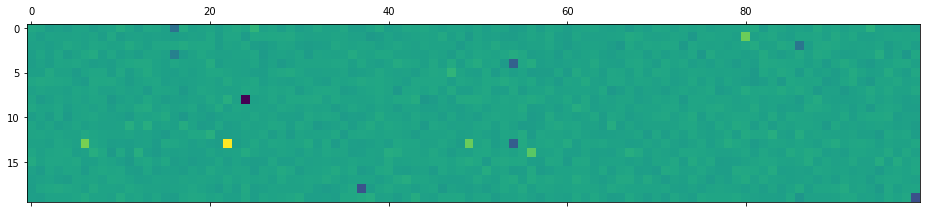

In [171]:
plt.matshow(model.get_sparse()[:,:100])

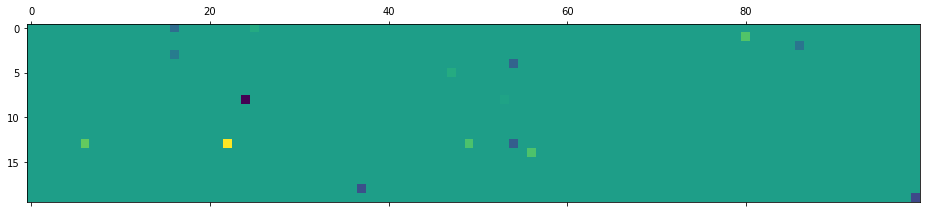

In [172]:
plt.matshow(C_0.reshape((20,-1))[:,:100])

In [64]:
sparse_0=model.get_sparse()
new_mat=mat_0-sparse_0
new_mat.reshape(20,20,5000)
mat_1=ten2mat(new_mat,1)
model.fit(mat_1)
sparse_1=model.get_sparse()
new_mat=mat_1-sparse_1
new_mat.reshape(20,20,5000)

0
900.0
Converged!


array([[[ 0.0036567 , -0.02912658, -0.0117934 , ..., -0.05618461,
         -0.04936025, -0.07135953],
        [ 0.00071488, -0.00439208, -0.00439791, ...,  0.00300396,
          0.00082603,  0.0055581 ],
        [-0.00534516,  0.05520548,  0.03966536, ...,  0.01641648,
          0.00732843,  0.01828584],
        ...,
        [-0.00530193, -0.00304178,  0.01976577, ..., -0.01503508,
         -0.02829175, -0.02308156],
        [-0.00129325, -0.00857018,  0.01181772, ...,  0.00627953,
          0.00473604,  0.004424  ],
        [-0.02110801,  0.00506883, -0.01112605, ...,  0.05104714,
          0.04706862,  0.05238453]],

       [[-0.00279525,  0.03340386,  0.02524026, ...,  0.01870334,
          0.01873299,  0.00151867],
        [ 0.00654926,  0.02045838,  0.02736356, ...,  0.01004314,
          0.01737571,  0.01858207],
        [-0.00245048,  0.00821323,  0.01291584, ...,  0.01550656,
          0.02724973,  0.01482708],
        ...,
        [-0.02016871,  0.01113161,  0.00771181, ...,  

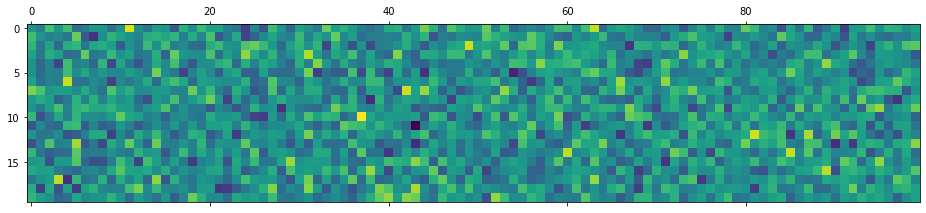

In [24]:
plt.matshow((y-C_0)[0,:,:100])

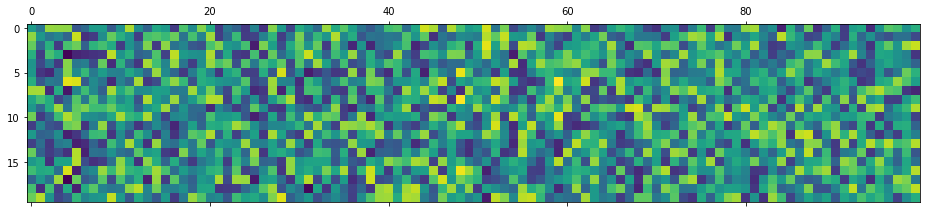

In [25]:
plt.matshow(new[0,:,:100])

In [26]:
percentage_error(y-C_0,new)

0.5910203341005333


In [27]:
percentage_error(y-C_0,y)

6.171693391967358
